### pip install & import

In [1]:
# %pip install sklearn 
# %pip install seaborn
# %pip install cmake
# %pip install xgboost
# %pip install -U pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
#import pandas_profiling
import datetime

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

# from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_validate

# 2003~2024년 데이터 전처리


### 데이터 값 읽어오기

In [3]:
# 데이터 값 읽어오기 
data_file = "../data/movie_data/KOBIS_개봉일람_2023-03-23.csv"
df = pd.read_csv(data_file, encoding='UTF-8',index_col = "순번")

### 생략된 내용을 추가로 보는 코드

In [4]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 200)
# col 생략 없이 출력
pd.set_option('display.max_columns', 200)

In [5]:
# 널값 확인
df.isnull()

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,서울 매출액,서울 관객수,장르,등급,영화구분
순번,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19900,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
19901,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
19902,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# 빈값 확인

df.isnull().sum()

영화명            0
감독          1298
제작사        12618
수입사         8178
배급사           76
개봉일            2
영화유형           0
영화형태           1
국적             1
전국 스크린수        0
전국 매출액        44
전국 관객수         0
서울 매출액        50
서울 관객수         0
장르            71
등급             5
영화구분           0
dtype: int64

In [7]:
# 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19904 entries, 1 to 19904
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      19904 non-null  object
 1   감독       18606 non-null  object
 2   제작사      7286 non-null   object
 3   수입사      11726 non-null  object
 4   배급사      19828 non-null  object
 5   개봉일      19902 non-null  object
 6   영화유형     19904 non-null  object
 7   영화형태     19903 non-null  object
 8   국적       19903 non-null  object
 9   전국 스크린수  19904 non-null  object
 10  전국 매출액   19860 non-null  object
 11  전국 관객수   19904 non-null  object
 12  서울 매출액   19854 non-null  object
 13  서울 관객수   19904 non-null  object
 14  장르       19833 non-null  object
 15  등급       19899 non-null  object
 16  영화구분     19904 non-null  object
dtypes: object(17)
memory usage: 2.7+ MB


### 결측치 데이터 처리하기

In [8]:
# 제작사, 수입사는 결측치가 너무 많아, drop
# 나머지 결측치는 기타로 변경

df = df.drop(['제작사', '수입사'], axis=1)
df['감독'].fillna('기타', inplace=True)
df['장르'].fillna('기타', inplace=True)
df['배급사'].fillna('기타', inplace=True)
df['영화형태'].fillna('기타', inplace=True)

# 한개가 결측치가 나와서 기타로 치환
df['국적'].fillna('기타', inplace=True)

# 서울 매출액 결측치 제거(사용을 안하니깨문에 0으로 변경)
df['서울 매출액'].fillna(0, inplace=True)
# 남은 결측치 제거

for i in df['개봉일'][df['개봉일'].isnull()].index:
    df = df.drop(i)

for i in df['전국 매출액'][df['전국 매출액'].isnull()].index:
    df = df.drop(i)

for i in df['등급'][df['등급'].isnull()].index:
    df = df.drop(i)

In [9]:
# 최종확인

df.isnull().sum()

영화명        0
감독         0
배급사        0
개봉일        0
영화유형       0
영화형태       0
국적         0
전국 스크린수    0
전국 매출액     0
전국 관객수     0
서울 매출액     0
서울 관객수     0
장르         0
등급         0
영화구분       0
dtype: int64

### 범주형 데이터값 확인

In [10]:
# 범주형 데이터 값 확인

category_cols = ['영화명','감독', '배급사', '영화유형','영화형태','국적','장르','등급','영화구분',]

# 범주형 데이터의 unique 확인
for col in category_cols:
    print('컬럼 [{}] UNIQUE : {}'.format(col, len(df[col].unique())))

컬럼 [영화명] UNIQUE : 19484
컬럼 [감독] UNIQUE : 7876
컬럼 [배급사] UNIQUE : 1357
컬럼 [영화유형] UNIQUE : 1
컬럼 [영화형태] UNIQUE : 4
컬럼 [국적] UNIQUE : 72
컬럼 [장르] UNIQUE : 21
컬럼 [등급] UNIQUE : 18
컬럼 [영화구분] UNIQUE : 2


### 복수의 감독, 배급사 데이터를 한개 데이터로 변경, (연령)등급 4가지로 정리

In [11]:
# 다수의 감독 데이터 변경
for idx, row in df.iterrows():
    if ',' in row['감독']:
        directors = row['감독'].split(',')
        # 양 끝 공백 제거 후 정렬
        directors.sort(key=lambda x : x.strip())
        df['감독'][idx] = directors[0].strip()

In [12]:
# 다수의 배급사를 앞에 있는 배급사로 취급

for idx, row in df.iterrows():
    if ',' in row['배급사']:
        distributor = row['배급사'].split(',')
        # 양 끝 공백 제거 후 변경
        df['배급사'][idx] = distributor[0].strip()

In [13]:
# 영화유형은 두개 뿐이라 제거

df.drop('영화유형', axis=1, inplace=True)

In [14]:
# 등급 데이터 전처리

for idx, row in df.iterrows():
    if ',' in row['등급']:
        ratings = row['등급'].split(',')
        # 전체, 12, 15, 청소년관람불가 순
        if '전체' in ratings:
            df['등급'][idx] = '전체관람가'
        elif '12' in ratings:
            df['등급'][idx] = '12세관람가'
        elif '15' in ratings:
            df['등급'][idx] = '15세관람가'
        else:
            df['등급'][idx] = '청소년관람불가'
    elif df['등급'][idx] == '18세관람가' or df['등급'][idx] == '제한상영가': 
        df['등급'][idx] = '청소년관람불가'
    else:
        df['등급'][idx] = df['등급'][idx].replace('이상', '')

### 전국 매출액, 스크린수, 관객수 int 타입변경 

In [15]:
# 전국 매출액, 스크린 수, 관객수를 확인을 위해 int형으로 변경

df['전국 매출액'] = df['전국 매출액'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 매출액'] = df['전국 매출액'].astype('int64')

df['전국 스크린수'] = df['전국 스크린수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 스크린수'] = df['전국 스크린수'].astype('int64')

df['전국 관객수'] = df['전국 관객수'].str.replace(pat=r',', repl=r'', regex=True)
df['전국 관객수'] = df['전국 관객수'].astype('int64')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19854 entries, 1 to 19904
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      19854 non-null  object
 1   감독       19854 non-null  object
 2   배급사      19854 non-null  object
 3   개봉일      19854 non-null  object
 4   영화형태     19854 non-null  object
 5   국적       19854 non-null  object
 6   전국 스크린수  19854 non-null  int64 
 7   전국 매출액   19854 non-null  int64 
 8   전국 관객수   19854 non-null  int64 
 9   서울 매출액   19854 non-null  object
 10  서울 관객수   19854 non-null  object
 11  장르       19854 non-null  object
 12  등급       19854 non-null  object
 13  영화구분     19854 non-null  object
dtypes: int64(3), object(11)
memory usage: 2.8+ MB


# 데이터 리사이징 하기
전국 스크린수, 전국 관객수 좌로 편향된 그래프 pr_report.html(태현폴더) <br>
때문에 아래의 리사이징 실행


In [17]:
# 스크린 수로 하였으나, 몇몇 역대 영화들이 사라져서 전국 관객수 10000명 기준으로 변경

movie_resize = df[(df['전국 관객수'] > 10000)]
movie_resize.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 1 to 4867
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      4835 non-null   object
 1   감독       4835 non-null   object
 2   배급사      4835 non-null   object
 3   개봉일      4835 non-null   object
 4   영화형태     4835 non-null   object
 5   국적       4835 non-null   object
 6   전국 스크린수  4835 non-null   int64 
 7   전국 매출액   4835 non-null   int64 
 8   전국 관객수   4835 non-null   int64 
 9   서울 매출액   4835 non-null   object
 10  서울 관객수   4835 non-null   object
 11  장르       4835 non-null   object
 12  등급       4835 non-null   object
 13  영화구분     4835 non-null   object
dtypes: int64(3), object(11)
memory usage: 566.6+ KB


In [18]:
# 스크린 수로 하였으나, 몇몇 역대 영화들이 사라져서 전국 관객수 10000명 기준으로 변경

movie_resize2 = df[(df['전국 관객수'] > 1000) & (df['전국 스크린수'] > 50)& (df['전국 관객수'] < 11000000)]
movie_resize2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 25 to 7927
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   영화명      4148 non-null   object
 1   감독       4148 non-null   object
 2   배급사      4148 non-null   object
 3   개봉일      4148 non-null   object
 4   영화형태     4148 non-null   object
 5   국적       4148 non-null   object
 6   전국 스크린수  4148 non-null   int64 
 7   전국 매출액   4148 non-null   int64 
 8   전국 관객수   4148 non-null   int64 
 9   서울 매출액   4148 non-null   object
 10  서울 관객수   4148 non-null   object
 11  장르       4148 non-null   object
 12  등급       4148 non-null   object
 13  영화구분     4148 non-null   object
dtypes: int64(3), object(11)
memory usage: 486.1+ KB


In [19]:
# 값 내보내기
#movie_resize.to_csv('./movie_resize2.csv',index=False, encoding="utf-8-sig")

In [20]:
# 배급사 변경

# '( )' 안쪽의 글씨 (ex> (주), (유), (사) etc.,) 함께 삭제
movie_resize2['배급사']=movie_resize2.배급사.str.replace(r"\(.*\)","") 
movie_resize2['배급사']=movie_resize2.배급사.str.replace("㈜","")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("주식회사","")

# (주)씨제이이엔엠 으로 통일
movie_resize2['배급사']=movie_resize2.배급사.str.replace("CJ ENM","(주)씨제이이엔엠")

# 롯데엔터테인먼트 로 통일
movie_resize2['배급사']=movie_resize2.배급사.str.replace("롯데쇼핑롯데엔터테인먼트","롯데엔터테인먼트")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("롯데컬처웍스(주)롯데엔터테인먼트","롯데엔터테인먼트")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("롯데쇼핑(주)롯데시네마","롯데엔터테인먼트")


# 월트디즈니스튜디오스코리아 로 통일
movie_resize2['배급사']=movie_resize2.배급사.str.replace("월트디즈니컴퍼니코리아 유한책임회사","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("소니픽쳐스릴리징월트디즈니스튜디오스코리아","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("브에나비스타인터내셔널코리아","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("소니픽쳐스엔터테인먼트코리아식회사극장배급지점","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("한국소니픽쳐스릴리징브에나비스타영화㈜","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("소니픽쳐스릴리징코리아","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("월트디즈니코리아","월트디즈니스튜디오스코리아")
movie_resize2['배급사']=movie_resize2.배급사.str.replace("월트디즈니컴퍼니코리아","월트디즈니스튜디오스코리아")

# 이십세기폭스코리아 로 통일
movie_resize2['배급사']=movie_resize2.배급사.str.replace("이십세기폭스필름코퍼레이션","이십세기폭스코리아")

# 이름 통일 (KBS 미디어)
movie_resize2['배급사']=movie_resize2.배급사.str.replace("케이비에스미디어","KBS 미디어")

# 이름 통일 (에스케이 텔레콤)
movie_resize2['배급사']=movie_resize2.배급사.str.replace("에스케이플래닛","에스케이텔레콤")

C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\832054470.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_resize2['배급사']=movie_resize2.배급사.str.replace(r"\(.*\)","")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\832054470.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['배급사']=movie_resize2.배급사.str.replace(r"\(.*\)","")
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\832054470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [21]:
movie_resize2['배급사']

순번
25      월트디즈니스튜디오스코리아
26      월트디즈니스튜디오스코리아
27             씨제이이엔엠
28      월트디즈니스튜디오스코리아
29         워너브러더스 코리아
            ...      
7763         스톰픽쳐스코리아
7781          팝엔터테인먼트
7808          얼리버드픽쳐스
7873        제이앤씨미디어그룹
7927         박수엔터테인먼트
Name: 배급사, Length: 4148, dtype: object

In [49]:
movie_resize2.head()

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절,총 관객수,관객비율,출연,평점
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,장편,미국,2809,137325939643,10779198,액션,12세관람가,일반영화,2022,12,겨울,112805094,0.095556,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스...",8.32
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화,2015,4,봄,217299523,0.048295,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']",8.49
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화,2019,5,봄,226678777,0.045496,"['크리스틴 벨', '이디나 멘젤']",9.13
3,28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화,2014,1,겨울,215068958,0.047873,"['매튜 맥커너히', '앤 해서웨이', '마이클 케인', '제시카 차스테인']",9.12
4,29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,장편,미국,1342,82274331200,10273803,SF,12세관람가,일반영화,2014,11,가을,215068958,0.047770,"['라미 말렉', '조셉 마젤로', '루시 보인턴', '벤 하디', '귈림 리']",9.42


In [22]:
movie_resize2['배급사'].value_counts()

롯데엔터테인먼트            236
                    235
씨제이이엔엠              232
유니버설픽쳐스인터내셔널 코리아    206
워너브러더스 코리아          150
                   ... 
필름더데이즈                1
아이엠비씨                 1
토이 엔터테인먼트             1
 온 피크                 1
윤스                    1
Name: 배급사, Length: 241, dtype: int64

In [23]:
# 국적 데이터 변경
for idx, row in movie_resize2.iterrows():
    if  row['국적'] not in ['미국', '한국', '일본', '영국', '프랑스','중국','독일']:
        movie_resize2['국적'][idx] = '기타'


C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\1341639067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['국적'][idx] = '기타'


In [24]:
# 값 확인

movie_resize2['국적'].value_counts()


미국     1527
한국     1269
일본      412
기타      411
영국      189
프랑스     164
중국      118
독일       58
Name: 국적, dtype: int64

In [25]:
# 값 내보내기
# movie_resize.to_csv('./movie_resize2.csv',index=False, encoding="utf-8-sig")

### 날짜 데이터 datetime으로 변경

In [26]:
# 날짜 데이터를 datetime으로 변경
movie_resize2['개봉일'] = movie_resize2['개봉일'].astype('datetime64')
movie_resize2['연도'] = movie_resize2['개봉일'].dt.year
movie_resize2['월'] = movie_resize2['개봉일'].dt.month

movie_resize2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 25 to 7927
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   영화명      4148 non-null   object        
 1   감독       4148 non-null   object        
 2   배급사      4148 non-null   object        
 3   개봉일      4148 non-null   datetime64[ns]
 4   영화형태     4148 non-null   object        
 5   국적       4148 non-null   object        
 6   전국 스크린수  4148 non-null   int64         
 7   전국 매출액   4148 non-null   int64         
 8   전국 관객수   4148 non-null   int64         
 9   서울 매출액   4148 non-null   object        
 10  서울 관객수   4148 non-null   object        
 11  장르       4148 non-null   object        
 12  등급       4148 non-null   object        
 13  영화구분     4148 non-null   object        
 14  연도       4148 non-null   int64         
 15  월        4148 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(10)
memory usage: 679.9+ KB


C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\2014669806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['개봉일'] = movie_resize2['개봉일'].astype('datetime64')
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\2014669806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['연도'] = movie_resize2['개봉일'].dt.year
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\2014669806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

### 시즌 데이터 변경

In [27]:
# 시즌 데이터 변경

season = {12 : '겨울',
          1 : '겨울',
          2 : '겨울',
          3 : '봄',
          4 : '봄',
          5 : '봄',
          6 : '여름',
          7 : '여름',
          8 : '여름',
          9 : '가을',
          10 : '가을',
          11 : '가을'}

movie_resize2['계절'] = movie_resize2[['월']].apply(lambda x: x.map(season))


C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\2576401166.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['계절'] = movie_resize2[['월']].apply(lambda x: x.map(season))


In [28]:
movie_resize2.drop('서울 매출액', axis=1, inplace=True)
movie_resize2.drop('서울 관객수', axis=1, inplace=True)


C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\3840169299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2.drop('서울 매출액', axis=1, inplace=True)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\3840169299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2.drop('서울 관객수', axis=1, inplace=True)


In [29]:
movie_total_people = pd.read_csv('../data/movie_data/movie_total_people.csv',index_col='연도',encoding='UTF-8')
movie_total_people

,개봉편수,상영편수,매출액,관객수
연도,,,,
2004,280,300,"440,728,906,206","69,254,626"
2005,306,415,"780,364,979,467","123,352,059"
2006,351,482,"892,442,138,000","144,256,035"
2007,393,611,"965,486,624,538","152,022,992"
2008,380,804,"961,453,297,251","147,428,639"
2009,362,714,"1,083,196,004,950","155,398,654"
2010,430,797,"1,157,254,738,250","147,759,214"
2011,442,943,"1,235,799,464,200","159,724,465"
2012,641,"1,231","1,455,140,354,435","194,890,587"


In [30]:
movie_total_people['관객수'] = movie_total_people['관객수'].str.replace(pat=r',', repl=r'', regex=True)
movie_total_people['관객수'] = movie_total_people['관객수'].astype('int64')

In [31]:
movie_total_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2004 to 2023
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   개봉편수    20 non-null     object
 1   상영편수    20 non-null     object
 2   매출액     20 non-null     object
 3   관객수     20 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 800.0+ bytes


In [32]:
movie_resize2['총 관객수'] = [0 for _ in range(len(movie_resize2))]
movie_resize2

C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\2770689088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['총 관객수'] = [0 for _ in range(len(movie_resize2))]


,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절,총 관객수
순번,,,,,,,,,,,,,,,,
25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,장편,미국,2809,137325939643,10779198,액션,12세관람가,일반영화,2022,12,겨울,0
26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화,2015,4,봄,0
27,기생충,봉준호,씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화,2019,5,봄,0
28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화,2014,1,겨울,0
29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,장편,미국,1342,82274331200,10273803,SF,12세관람가,일반영화,2014,11,가을,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,앙상블,정형석,스톰픽쳐스코리아,2020-11-05,장편,한국,52,10376610,1140,드라마,12세관람가,독립/예술영화,2020,11,가을,0
7781,퍼펙트 스틸,기타,팝엔터테인먼트,2021-10-28,장편,영국,66,10073100,1122,범죄,15세관람가,일반영화,2021,10,가을,0
7808,신 테니스의 왕자 효테이 vs 릿카이 : 게임 오브 퓨처 전편,카와구치 케이이치로,얼리버드픽쳐스,2021-03-24,장편,일본,60,8850500,1102,애니메이션,전체관람가,일반영화,2021,3,봄,0


In [33]:
for idx, row in movie_total_people.iterrows():
    movie_resize2['총 관객수'][movie_resize2['연도'] == idx] = row['관객수']


C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\806322128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['총 관객수'][movie_resize2['연도'] == idx] = row['관객수']
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\806322128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['총 관객수'][movie_resize2['연도'] == idx] = row['관객수']
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\806322128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [34]:
# 관객 비율 구하기 
movie_resize2['관객비율'] = (movie_resize2['전국 관객수'] / movie_resize2['총 관객수'])
# 2003 1997 총 관객수 0명 데이터 때문에 위 코드 실행

C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\1704996581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2['관객비율'] = (movie_resize2['전국 관객수'] / movie_resize2['총 관객수'])


In [35]:
movie_resize2[movie_resize2['관객비율']==np.inf] = 0

C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\1337129329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_resize2[movie_resize2['관객비율']==np.inf] = 0


# 예지언니 크롤링 데이터 머지

In [36]:
# 네이버 평점과 배우 가져옴

df2 = pd.read_csv("../data/movie_data/concat.csv", encoding='UTF-8',index_col='순번')
df2 = df2.drop(['네이버URL','이미지URL','제작연도','감독','영화명','연도'],axis=1)

In [37]:
# null 값이 있는 열 삭제 
for i in df2['출연'][df2['출연'].isnull()].index:
    df2 = df2.drop(i)

In [38]:
movie_resize2 = pd.merge(movie_resize2,df2,left_index=True,right_index=True)

# 리사이징 된 데이터에서 top 300 생성

### top 200 생성
movie_resize_ranking.csv

In [39]:
# top200 만듬

col = ['순번', '영화명', '감독', '배급사', '개봉일', '출연']
movie_resize2.reset_index(drop=False,inplace=True)
movie_resize2[col][:300].to_csv(
    '../data/movie_data/movie_resize_ranking.csv', encoding="utf-8-sig")


In [40]:
# top 200 불러오기

movie_resize_ranking = pd.read_csv('../data/movie_data/movie_resize_ranking.csv',index_col='순번',encoding='UTF-8')
movie_resize_ranking.drop('Unnamed: 0', axis=1, inplace=True)
movie_resize_ranking

,영화명,감독,배급사,개봉일,출연
순번,,,,,
25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14 00:00:00,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스..."
26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23 00:00:00,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']"
27,기생충,봉준호,씨제이이엔엠,2019-05-30 00:00:00,"['크리스틴 벨', '이디나 멘젤']"
28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16 00:00:00,"['매튜 맥커너히', '앤 해서웨이', '마이클 케인', '제시카 차스테인']"
29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06 00:00:00,"['라미 말렉', '조셉 마젤로', '루시 보인턴', '벤 하디', '귈림 리']"
...,...,...,...,...,...
413,싱크홀,김지훈,쇼박스,2021-08-11 00:00:00,"['강동원', '고수', '정은채']"
414,악의 연대기,백운학,씨제이이엔엠,2015-05-14 00:00:00,"['하지원', '김명민']"
415,강남 1970,유하,쇼박스,2015-01-21 00:00:00,"['하나에 나츠키', '키토 아카리', '이경태', '김연우', '김지율', '이호..."


In [50]:
movie_resize2

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절,총 관객수,관객비율,출연,평점
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,장편,미국,2809,137325939643,10779198,액션,12세관람가,일반영화,2022,12,겨울,112805094,0.095556,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스...",8.32
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화,2015,4,봄,217299523,0.048295,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']",8.49
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화,2019,5,봄,226678777,0.045496,"['크리스틴 벨', '이디나 멘젤']",9.13
3,28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화,2014,1,겨울,215068958,0.047873,"['매튜 맥커너히', '앤 해서웨이', '마이클 케인', '제시카 차스테인']",9.12
4,29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,장편,미국,1342,82274331200,10273803,SF,12세관람가,일반영화,2014,11,가을,215068958,0.047770,"['라미 말렉', '조셉 마젤로', '루시 보인턴', '벤 하디', '귈림 리']",9.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,4827,도망친 여자,홍상수,영화제작전원사,2020-09-17,장편,한국,143,86573240,10284,드라마,청소년관람불가,독립/예술영화,2020,9,가을,59523967,0.000173,"['사카구치 켄타로', '키타무라 카즈키', '키치세 미치코']",6.16
3069,4830,킹 리차드,레이날도 마르쿠스 그린,워너브러더스 코리아,2022-03-24,장편,미국,156,99918100,10266,가족,12세관람가,일반영화,2022,3,봄,112805094,0.000091,"['난니 모레티', '마거리타 부이', '존 터투로']",7.35
3070,4831,"아이, 토냐",크레이그 질레스피,영화사 진진,2018-03-08,장편,미국,186,81657900,10261,드라마,청소년관람불가,독립/예술영화,2018,3,봄,216385269,0.000047,"['계륜미', '임진희']",8.03
3071,4833,너와 파도를 탈 수 있다면,유아사 마사아키,플러스엠 엔터테인먼트,2020-07-08,장편,일본,257,88566980,10210,애니메이션,12세관람가,독립/예술영화,2020,7,여름,59523967,0.000172,"['줄리안 무어', '존 터투로']",7.70


In [51]:
movie_resize_ranking

,순번,영화명,감독,배급사,개봉일,출연
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스..."
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']"
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30,"['크리스틴 벨', '이디나 멘젤']"
3,28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,"['매튜 맥커너히', '앤 해서웨이', '마이클 케인', '제시카 차스테인']"
4,29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,"['라미 말렉', '조셉 마젤로', '루시 보인턴', '벤 하디', '귈림 리']"
...,...,...,...,...,...,...
295,413,싱크홀,김지훈,쇼박스,2021-08-11,"['강동원', '고수', '정은채']"
296,414,악의 연대기,백운학,씨제이이엔엠,2015-05-14,"['하지원', '김명민']"
297,415,강남 1970,유하,쇼박스,2015-01-21,"['하나에 나츠키', '키토 아카리', '이경태', '김연우', '김지율', '이호..."
298,418,이상한 나라의 앨리스,팀 버튼,한국소니픽쳐스릴리징브에나비스타영화,2010-03-04,"['브래드리 휘트포드', '앨리슨 윌리암스', '캐서린 키너', '다니엘 칼루야']"


In [41]:
# 점수화를 위해 개봉일을 datetime 타입으로 변경

movie_resize_ranking['개봉일'] = movie_resize_ranking['개봉일'].astype('datetime64')

### 점수화행 만들기

In [42]:
# 점수화행 만들기

import datetime

movie_resize2['개봉일'] = movie_resize2['개봉일'].astype('datetime64')

movie_final = movie_resize2.copy()
movie_final['감독_흥행'] = [0 for _ in range(len(movie_resize2))]
movie_final['배급사_흥행'] = [0 for _ in range(len(movie_resize2))]
movie_final['주연배우_흥행'] = [0 for _ in range(len(movie_resize2))]

In [43]:
# 순번을 쓰기 위해 인덱스 풀기

movie_resize_ranking.reset_index(drop=False,inplace=True)

### 감독, 배급사 점수화 코드

In [44]:
# 감독 점수화 코드

for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    director = row['감독'].strip()
    # Top300 중 개봉일 이전 영화의 감독 확인
    directors = movie_resize_ranking[(movie_resize_ranking['개봉일'] < open) & (movie_resize_ranking['감독'] == director)]
    # 해당 감독이 있다면 흥행 여부 표시
    if len(directors) > 0:
        score = directors.index[0]
        if score >= 271:
            score = 1
        elif score >= 241:
            score = 2
        elif score >= 211:
            score = 3
        elif score >= 181:
            score = 4
        elif score >= 151:
            score = 5
        elif score >= 121:
            score = 6
        elif score >= 91:
            score = 7
        elif score >= 61:
            score = 8
        elif score >= 31:
            score = 9
        else:
            score = 10
        movie_final.loc[idx, '감독_흥행'] = score

In [52]:
# 배급사 정수화 코드 
for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    director = row['배급사'].strip()
    # Top300 중 개봉일 이전 영화의 감독 확인
    directors = movie_resize_ranking[(movie_resize_ranking['개봉일'] < open) & (movie_resize_ranking['배급사'] == director)]
    # 해당 감독이 있다면 흥행 여부 표시
    if len(directors) > 0:
        score = directors.index[0]
        if score >= 271:
            score = 1
        elif score >= 241:
            score = 2
        elif score >= 211:
            score = 3
        elif score >= 181:
            score = 4
        elif score >= 151:
            score = 5
        elif score >= 121:
            score = 6
        elif score >= 91:
            score = 7
        elif score >= 61:
            score = 8
        elif score >= 31:
            score = 9
        else:
            score = 10
        movie_final.loc[idx, '배급사_흥행'] = score

In [53]:
# 배우의 경우 '["배우1", "배우2"]'와 같은 형태이므로 각 값을 뽑아낸다.
# literal_evel : 문자열 그대로 파이썬 명령을 실행시켜주는 함수
# 예시---------------------------------------
# 문자열 : "['문자열1', '문자열2', 22, '33']"
# 리스트 : ['문자열1', '문자열2', 22, '33']
from ast import literal_eval


In [46]:
for idx, row in movie_final.iterrows():
    # 개봉일 기준
    open = datetime.datetime.strftime(row['개봉일'], '%Y-%m-%d')
    # 해당 영화의 배우 확인
    this_actors = literal_eval(row['출연'])
    scores = [0] * len(this_actors)
    # 개봉일 이전 영화의 모든 배우 확인
    for i in range(len(this_actors)):
        actors = movie_resize_ranking.query(f'개봉일 < "{open}"')
        actors = actors.query(
            f'출연.str.contains("{this_actors[i]}")', engine='python')
        if len(actors) > 0:
            score = actors.index[0]
            if score >= 271:
                score = 1
            elif score >= 241:
                score = 2
            elif score >= 211:
                score = 3
            elif score >= 181:
                score = 4
            elif score >= 151:
                score = 5
            elif score >= 121:
                score = 6
            elif score >= 91:
                score = 7
            elif score >= 61:
                score = 8
            elif score >= 31:
                score = 9
            else:
                score = 10
            scores[i] = score

    # 평균/합/최대값 중에 잘 나오는 걸로        
    # 평균값
    # movie_final.loc[idx, '주연배우_흥행'] = round(sum(scores) / len(scores), 1)
    # 합
    movie_final.loc[idx, '주연배우_흥행'] = sum(scores)
    # 최대값
    # movie_final.loc[idx, '주연배우_흥행'] = max(scores)


In [47]:
# 값 확인
(movie_final['배급사_흥행'] == 0).value_counts()

True    3073
Name: 배급사_흥행, dtype: int64

### moive final

In [54]:

movie_final

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절,총 관객수,관객비율,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,장편,미국,2809,137325939643,10779198,액션,12세관람가,일반영화,2022,12,겨울,112805094,0.095556,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스...",8.32,0,10,78
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,장편,미국,1843,88582586366,10494499,액션,12세관람가,일반영화,2015,4,봄,217299523,0.048295,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']",8.49,9,10,22
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30,장편,한국,1948,87459829095,10313086,드라마,15세관람가,일반영화,2019,5,봄,226678777,0.045496,"['크리스틴 벨', '이디나 멘젤']",9.13,10,10,0
3,28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,장편,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화,2014,1,겨울,215068958,0.047873,"['매튜 맥커너히', '앤 해서웨이', '마이클 케인', '제시카 차스테인']",9.12,0,10,9
4,29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,장편,미국,1342,82274331200,10273803,SF,12세관람가,일반영화,2014,11,가을,215068958,0.047770,"['라미 말렉', '조셉 마젤로', '루시 보인턴', '벤 하디', '귈림 리']",9.42,9,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,4827,도망친 여자,홍상수,영화제작전원사,2020-09-17,장편,한국,143,86573240,10284,드라마,청소년관람불가,독립/예술영화,2020,9,가을,59523967,0.000173,"['사카구치 켄타로', '키타무라 카즈키', '키치세 미치코']",6.16,0,0,0
3069,4830,킹 리차드,레이날도 마르쿠스 그린,워너브러더스 코리아,2022-03-24,장편,미국,156,99918100,10266,가족,12세관람가,일반영화,2022,3,봄,112805094,0.000091,"['난니 모레티', '마거리타 부이', '존 터투로']",7.35,0,10,10
3070,4831,"아이, 토냐",크레이그 질레스피,영화사 진진,2018-03-08,장편,미국,186,81657900,10261,드라마,청소년관람불가,독립/예술영화,2018,3,봄,216385269,0.000047,"['계륜미', '임진희']",8.03,0,0,0
3071,4833,너와 파도를 탈 수 있다면,유아사 마사아키,플러스엠 엔터테인먼트,2020-07-08,장편,일본,257,88566980,10210,애니메이션,12세관람가,독립/예술영화,2020,7,여름,59523967,0.000172,"['줄리안 무어', '존 터투로']",7.70,0,9,18


# 최종 데이터 불러오기
위에코드를 매번 실행하지 않고 파일로 불러와서 실행 

# ????

In [12]:
# # 데이터 불러오기(파일 미완성.movie_resize2와 이름이 다름 )
# df = pd.read_csv('./movie_resize2.csv',index_col=0,encoding='UTF-8')
# df.reset_index(drop=False,inplace=True)
# df

,영화명,감독,배급사,개봉일,영화형태,국적,전국스크린수,전국 매출액,전국 관객수,장르,등급,영화구분
0,명량,김한민,(주)씨제이이엔엠,2014-07-30,장편,한국,1587,135748398910,17613682,사극,15세관람가,일반영화
1,극한직업,이병헌,(주)씨제이이엔엠,2019-01-23,장편,한국,1978,139647979516,16264944,코미디,15세관람가,일반영화
2,신과함께-죄와 벌,김용화,롯데쇼핑㈜롯데엔터테인먼트,2017-12-20,장편,한국,1912,115698654137,14410754,판타지,12세관람가,일반영화
3,국제시장,윤제균,(주)씨제이이엔엠,2014-12-17,장편,한국,966,110828014630,14245998,드라마,12세관람가,일반영화
4,어벤져스: 엔드게임,안소니 루소,월트디즈니컴퍼니코리아 유한책임회사,2019-04-24,장편,미국,2835,122182694160,13934592,액션,12세관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...
4637,나의 어머니,난니 모레티,(주)티캐스트,2015-08-20,장편,이탈리아,30,76569151,10031,드라마,12세관람가,독립/예술영화
4638,타이페이 카페 스토리,샤오 야 췐,찬란,2011-07-07,장편,대만,10,76832900,10023,드라마,전체관람가,독립/예술영화
4639,테라 3D: 인류 최후의 전쟁,아리스토메니스 치바스,주식회사 마운틴픽쳐스,2010-11-04,장편,미국,48,106210549,10023,애니메이션,전체관람가,일반영화
4640,글로리아 벨,세바스찬 렐리오,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점,2019-06-06,장편,미국,48,77962520,10021,드라마,15세관람가,독립/예술영화


# ---전처리---

## 원핫인코딩 

In [72]:
# 원핫인코딩

# movie_labels = pd.get_dummies(movie_final,columns = ['국적','장르','등급','계절'])

## 라벨링

In [55]:
from sklearn.preprocessing import LabelEncoder

le_form = LabelEncoder()
le_nation = LabelEncoder()
le_genre = LabelEncoder()
le_rating = LabelEncoder()
le_class = LabelEncoder()
le_season = LabelEncoder()

movie_labels = movie_final.copy()
movie_labels['영화형태'] = le_form.fit_transform(movie_final['영화형태'])
movie_labels['국적'] = le_nation.fit_transform(movie_final['국적'])
movie_labels['장르'] = le_genre.fit_transform(movie_final['장르'])
movie_labels['등급'] = le_rating.fit_transform(movie_final['등급'])
movie_labels['영화구분'] = le_class.fit_transform(movie_final['영화구분'])
movie_labels['계절'] = le_season.fit_transform(movie_final['계절'])
movie_labels.head(3)


,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절,총 관객수,관객비율,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,2,2,2809,137325939643,10779198,16,0,1,2022,12,1,112805094,0.095556,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스...",8.32,0,10,78
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,2,2,1843,88582586366,10494499,16,0,1,2015,4,2,217299523,0.048295,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']",8.49,9,10,22
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30,2,7,1948,87459829095,10313086,6,1,1,2019,5,2,226678777,0.045496,"['크리스틴 벨', '이디나 멘젤']",9.13,10,10,0


In [56]:
movie_labels_2023 = movie_labels[movie_labels['연도']==2023]

In [57]:
movie_labels_etc = movie_labels
for i in movie_labels_etc['연도'][movie_final['연도'] == 2023].index:
    movie_labels_etc = movie_labels_etc.drop(i)
movie_labels_etc

,순번,영화명,감독,배급사,개봉일,영화형태,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분,연도,월,계절,총 관객수,관객비율,출연,평점,감독_흥행,배급사_흥행,주연배우_흥행
0,25,아바타: 물의 길,제임스 카메론,월트디즈니스튜디오스코리아,2022-12-14,2,2,2809,137325939643,10779198,16,0,1,2022,12,1,112805094,0.095556,"['로버트 다우니 주니어', '크리스 헴스워스', '마크 러팔로', '크리스 에반스...",8.32,0,10,78
1,26,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니스튜디오스코리아,2015-04-23,2,2,1843,88582586366,10494499,16,0,1,2015,4,2,217299523,0.048295,"['송강호', '이선균', '조여정', '최우식', '박소담', '이정은', '장혜진']",8.49,9,10,22
2,27,기생충,봉준호,씨제이이엔엠,2019-05-30,2,7,1948,87459829095,10313086,6,1,1,2019,5,2,226678777,0.045496,"['크리스틴 벨', '이디나 멘젤']",9.13,10,10,0
3,28,겨울왕국,제니퍼 리,월트디즈니스튜디오스코리아,2014-01-16,2,2,1010,82461504400,10296101,15,2,1,2014,1,1,215068958,0.047873,"['매튜 맥커너히', '앤 해서웨이', '마이클 케인', '제시카 차스테인']",9.12,0,10,9
4,29,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아,2014-11-06,2,2,1342,82274331200,10273803,0,0,1,2014,11,0,215068958,0.047770,"['라미 말렉', '조셉 마젤로', '루시 보인턴', '벤 하디', '귈림 리']",9.42,9,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,4827,도망친 여자,홍상수,영화제작전원사,2020-09-17,2,7,143,86573240,10284,6,3,0,2020,9,0,59523967,0.000173,"['사카구치 켄타로', '키타무라 카즈키', '키치세 미치코']",6.16,0,0,0
3069,4830,킹 리차드,레이날도 마르쿠스 그린,워너브러더스 코리아,2022-03-24,2,2,156,99918100,10266,1,0,1,2022,3,2,112805094,0.000091,"['난니 모레티', '마거리타 부이', '존 터투로']",7.35,0,10,10
3070,4831,"아이, 토냐",크레이그 질레스피,영화사 진진,2018-03-08,2,2,186,81657900,10261,6,3,0,2018,3,2,216385269,0.000047,"['계륜미', '임진희']",8.03,0,0,0
3071,4833,너와 파도를 탈 수 있다면,유아사 마사아키,플러스엠 엔터테인먼트,2020-07-08,2,4,257,88566980,10210,15,0,0,2020,7,3,59523967,0.000172,"['줄리안 무어', '존 터투로']",7.70,0,9,18


In [58]:
# 사용하지 않는 컬럼 제거

not_used = ['영화명', '감독', '배급사', '영화형태', '개봉일', '영화구분', '연도', '월', '순번']

movie_DL = movie_labels_etc.drop(not_used, axis=1) # 2003~2022 데이터 main
movie_DL2 = movie_labels_2023.drop(not_used, axis=1)# 2023년 test


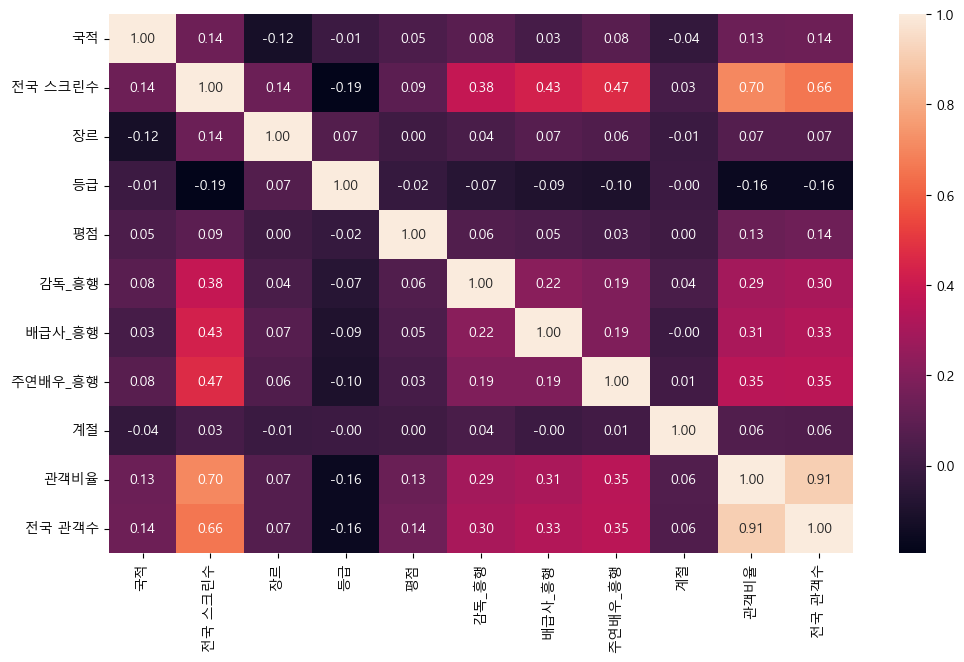

In [59]:
# 사용하는 수치형 데이터 히트맵
digital_cols2 = ['국적', '전국 스크린수', '장르', '등급', '평점',
                 '감독_흥행', '배급사_흥행', '주연배우_흥행', '계절', '관객비율', '전국 관객수']
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 7))
sns.heatmap(movie_DL[digital_cols2].corr(), annot=True, fmt='.2f')
plt.show()


In [60]:
# 입력 컬럼 확인(값을 하나 빼야한다 => 전국 관객수로 쓰려고)
len(movie_DL.columns)

14

In [76]:
# 독립 변수와 종속 변수 나눔

# 독립 = movie_DL[['감독_흥행', '배급사_흥행', '국적_기타', '국적_독일', '국적_미국',
#        '국적_영국', '국적_일본', '국적_중국', '국적_프랑스', '국적_한국', '장르_SF', '장르_가족', '장르_공연',
#        '장르_공포(호러)', '장르_기타', '장르_다큐멘터리', '장르_드라마', '장르_멜로/로맨스', '장르_뮤지컬',
#        '장르_미스터리', '장르_범죄', '장르_사극', '장르_서부극(웨스턴)', '장르_성인물(에로)', '장르_스릴러',
#        '장르_애니메이션', '장르_액션', '장르_어드벤처', '장르_전쟁', '장르_코미디', '장르_판타지',
#        '등급_12세관람가', '등급_15세관람가', '등급_전체관람가', '등급_청소년관람불가', '계절_가을', '계절_겨울',
#        '계절_봄', '계절_여름']] 
# 종속 = movie_DL[['전국 관객수']] 

NameError: name 'movie_DL' is not defined

In [ ]:
# 국적 => 국내 vs 해외
# 관객비율.. 2023년 데이터 총 관객수 몰라....
# 비율 말고 총 관객수를 쓰자
# 총관객수 defqult를 2022년으로 해서 2023년 총관객수 채우면 어때?

In [61]:
# 독립 변수와 종속 변수 나눔

독립 = movie_DL[['국적', '장르', '등급', '감독_흥행',
               '배급사_흥행', '계절', '관객비율', '전국 스크린수']]
종속 = movie_DL[['전국 관객수']]

In [62]:
# 독립 변수와 종속 변수 나눔

독립_2023 = movie_DL2[['국적', '장르', '등급', '감독_흥행',
               '배급사_흥행', '계절', '관객비율', '전국 스크린수']]
종속_2023 = movie_DL2[['전국 관객수']]


## train, test 데이터 나누기

In [63]:
# train, test 데이터 나눔

from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(독립,종속,test_size=0.25,random_state=42)

## 스케일링... 
...어디서 할까...<br>
라벨링 때문에 바로 스케일링을 따로 해줘야함 (전국스크린수, 전국매출액)

# 딥러닝 


In [102]:
# 딥러닝 층 여기가 중요

X = tf.keras.layers.Input(shape=[8])

H = tf.keras.layers.Dense(120)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(120)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)


H = tf.keras.layers.Dense(10)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
dropout = tf.keras.layers.Dropout(rate=0.2)(H)

Y = tf.keras.layers.Dense(1)(dropout)
model = tf.keras.models.Model(X,Y)
# sgd = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.8,beta_2=0.85)
sgd = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=sgd,loss='mae')

In [103]:
model.fit(train_input,train_target,batch_size=64,epochs=100,validation_data=(test_input,test_target))

Epoch 1/100
36/36 [==============================] - 1s 6ms/step - loss: 708667.0000 - val_loss: 724685.7500
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 708421.8125 - val_loss: 723956.4375
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 692451.3125 - val_loss: 4977566.0000
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 593418.7500 - val_loss: 11642143.0000
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 517035.2812 - val_loss: 7646173.0000
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 504868.2812 - val_loss: 2839445.5000
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 507613.6562 - val_loss: 1453904.6250
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 503652.8750 - val_loss: 765017.9375
Epoch 9/100
36/36 [==============================] - 0s 2ms/step - loss: 511588.0312 - val_loss: 650999.0625
Epoch 10/100


In [104]:
model.predict(train_input[:5])

1/1 [==============================] - 0s 79ms/step


array([[ 53188.465],
       [103414.99 ],
       [ 33858.54 ],
       [642405.7  ],
       [203215.69 ]], dtype=float32)

In [105]:
train_target[:5]

,전국 관객수
2475,26278
1757,90666
2963,12048
437,1515356
1927,66698


In [106]:
pred = model.predict(독립_2023).round(0)
# 여기랑 비슷한지 보기
종속_2023['pred'] = pred
종속_2023['오차율'] = (abs(종속_2023['전국 관객수'] - 종속_2023['pred'])) / 종속_2023['전국 관객수'] * 100
len(종속_2023.loc[종속_2023['오차율']>20])

2/2 [==============================] - 0s 3ms/step


C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\3446773907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  종속_2023['pred'] = pred
C:\Users\Playdata\AppData\Local\Temp\ipykernel_15032\3446773907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  종속_2023['오차율'] = (abs(종속_2023['전국 관객수'] - 종속_2023['pred'])) / 종속_2023['전국 관객수'] * 100


32

In [107]:
종속_2023[:]

,전국 관객수,pred,오차율
144,3638498,1168463.0,67.886117
382,1720865,1736311.0,0.897572
471,1376493,3147688.0,128.674465
675,829268,1037168.0,25.070303
762,663836,1380189.0,107.911141
1012,398964,1042328.0,161.258660
1068,346265,678658.0,95.993820
1184,274283,1104418.0,302.656380
1236,241148,957537.0,297.074411
1260,229558,770454.0,235.624984


# 태현 딥러닝

In [ ]:
# 딥러닝 층 여기가 중요

X = tf.keras.layers.Input(shape=[8])

H = tf.keras.layers.Dense(100)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)

H = tf.keras.layers.Dense(120)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation(tf.nn.swish)(H)
dropout = tf.keras.layers.Dropout(rate=0.2)(H)

Y = tf.keras.layers.Dense(1)(dropout)
model = tf.keras.models.Model(X,Y)
# sgd = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.8,beta_2=0.85)
sgd = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=sgd,loss='mae')

In [56]:
# 훈련

model.fit(train_input,train_target,batch_size=128,epochs=100,validation_data=(test_input,test_target))

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 708669.6250 - val_loss: 724692.0625
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 708655.9375 - val_loss: 724676.6250
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 708581.1875 - val_loss: 724578.6875
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 707963.4375 - val_loss: 723804.3750
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 702361.1250 - val_loss: 710498.0000
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 671356.0000 - val_loss: 724672.0000
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 615039.8750 - val_loss: 875843.3750
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 539296.7500 - val_loss: 1661295.8750
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 510871.2500 - val_loss: 982846.5000
Epoch 10/100
18/1

In [57]:
# 확인용도
model.predict(train_input[:5])

1/1 [==============================] - 0s 119ms/step


array([[ 86825.805],
       [162892.8  ],
       [ 66619.52 ],
       [731920.75 ],
       [283122.44 ]], dtype=float32)

In [58]:
# 여기랑 비슷한지 보기
train_target[:5]

,전국 관객수
2475,26278
1757,90666
2963,12048
437,1515356
1927,66698


In [61]:
# 확인용도

# 오차율 몇 %로...?
pred = model.predict(독립_2023).round(0)
# 여기랑 비슷한지 보기
종속_2023['pred'] = pred
종속_2023['오차율'] = (abs(종속_2023['전국 관객수'] - 종속_2023['pred'])) / 종속_2023['전국 관객수'] * 100
len(종속_2023.loc[종속_2023['오차율']>20])


2/2 [==============================] - 0s 3ms/step


C:\Users\Playdata\AppData\Local\Temp\ipykernel_4296\2658406512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  종속_2023['pred'] = pred
C:\Users\Playdata\AppData\Local\Temp\ipykernel_4296\2658406512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  종속_2023['오차율'] = (abs(종속_2023['전국 관객수'] - 종속_2023['pred'])) / 종속_2023['전국 관객수'] * 100


32

In [60]:
종속_2023[:]

,전국 관객수,pred,오차율
144,3638498,1781381.0,51.040759
382,1720865,2520844.0,46.487028
471,1376493,4175542.0,203.346403
675,829268,1509202.0,81.992070
762,663836,1994459.0,200.444538
1012,398964,1485100.0,272.239099
1068,346265,888460.0,156.583830
1184,274283,1576597.0,474.806678
1236,241148,1362807.0,465.133030
1260,229558,923097.0,302.119290


In [72]:
len(종속_2023)

33

In [62]:
# 값 스케일링

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [63]:
# 랜덤포레스트 돌려보기

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1,random_state=42)
scores = cross_validate(rf,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9850033428062577 0.8870659349522461


In [64]:
# 중요 특성 뽑기
rf.fit(train_input,train_target)
print(rf.feature_importances_)

[0.0024015  0.00911467 0.00431512 0.00645956 0.00470816 0.00469746
 0.92954444 0.03875908]


C:\Users\Playdata\AppData\Local\Temp\ipykernel_4296\1877097693.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_input,train_target)


In [65]:
# 간단한 랜덤포레스트

rf = RandomForestRegressor(n_jobs=-1,oob_score=True)
rf.fit(train_input,train_target)
print(rf.oob_score_)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_4296\3815337734.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_input,train_target)


0.8915348854521946


In [66]:
# 익스트림 ~~
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_jobs=-1,random_state=42)
scores = cross_validate(et,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

1.0 0.867385092700497


In [67]:
# 특성 확인
et.fit(train_input,train_target)
print(et.feature_importances_)

[0.00902559 0.01236264 0.01107267 0.02409491 0.04431974 0.01374557
 0.73174443 0.15363445]


C:\Users\Playdata\AppData\Local\Temp\ipykernel_4296\2393551193.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  et.fit(train_input,train_target)


In [68]:
# 그레이디션~~
# 매출액 관객비율 값을 넣기전에 나왔던 예측값

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
scores = cross_validate(gb,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9792717890595896 0.8660290545686236


In [69]:
pip install cmake

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 33.0/33.0 MB 34.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [70]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 89.1/89.1 MB 34.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [71]:
# xgboost 임

from xgboost import XGBRFRegressor
from sklearn.model_selection import cross_validate

xgb = XGBRFRegressor(tree_method='hist',random_state=42)
scores = cross_validate(xgb,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9661274801279337 0.8806985103648097
